In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random

sns.set_style("darkgrid")

#import data
headers = ['time_utc', 'id', 'active_power_watt','possible_power_watt','wind_speed','rpm','active_stop','control_state_id','online_data_expired','wind_direction','temperature','active_stop_user_id','received_time_utc']

parse_dates = ['time_utc', 'received_time_utc']
df = pd.read_csv("../AssetsData/new_online_data.csv", sep=',', names=headers, parse_dates=parse_dates, skiprows=1)
df = df[['time_utc', 'id', 'active_power_watt']]
df = df[df['id'].isin([93, 94, 96, 97, 47, 49, 50, 54])]
#cond1 = (df.time_utc == pd.Timestamp(2022,2,25))

cond1 = (df.time_utc > pd.Timestamp(2022,2,22,8,12)) & (df.time_utc < pd.Timestamp(2022,2,23,0,0))
#df = df.loc[cond1]

df.head()

print(df.dtypes)

C:\Users\User\AppData\Local\Temp\ipykernel_12496\425420595.py:14: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../online_data/new_online_data.csv", sep=',', names=headers, parse_dates=parse_dates, skiprows=1)


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

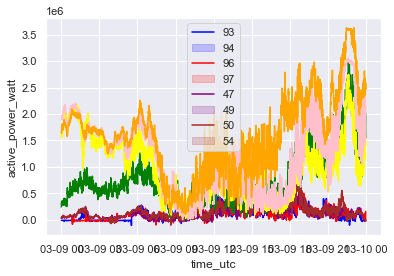

In [2]:
for i in range(9, 10):
    input(f'Day {i}')
    
    cond1 = (df.time_utc > pd.Timestamp(2022,3,i,0,0)) & (df.time_utc < pd.Timestamp(2022,3,i+1,0,0))
    df1 = df.loc[cond1]

    sns.set(rc = {'figure.figsize':(30, 16)})
    sns.lineplot(data = df1[df1['id'] == 93], x = 'time_utc', y = 'active_power_watt', color = 'blue')
    sns.lineplot(data = df1[df1['id'] == 94], x = 'time_utc', y = 'active_power_watt', color = 'red')
    sns.lineplot(data = df1[df1['id'] == 96], x = 'time_utc', y = 'active_power_watt', color = 'purple')
    sns.lineplot(data = df1[df1['id'] == 97], x = 'time_utc', y = 'active_power_watt', color = 'brown')
    sns.lineplot(data = df1[df1['id'] == 47], x = 'time_utc', y = 'active_power_watt', color = 'green')
    sns.lineplot(data = df1[df1['id'] == 49], x = 'time_utc', y = 'active_power_watt', color = 'yellow')
    sns.lineplot(data = df1[df1['id'] == 50], x = 'time_utc', y = 'active_power_watt', color = 'pink')
    sns.lineplot(data = df1[df1['id'] == 54], x = 'time_utc', y = 'active_power_watt', color = 'orange')
    plt.legend(labels = ['93', '94', '96', '97', '47', '49', '50', '54'])
    plt.show()
    

In [67]:
#march 4, 6, 9, 14, 16, 27, 28

plotting everyday for every asset to see which day is the best to create dummy forecast 

In [51]:
def generate_forecast(asset_id):
    cond1 = (df.time_utc > pd.Timestamp(2022,3,9,0,0)) & (df.time_utc < pd.Timestamp(2022,3,10,0,0))
    df_forecast = df.loc[cond1]
    df_forecast = df_forecast[df_forecast['id'] == asset_id]

    df_forecast.insert(column='dummy_active_power_watt', loc=3, value=df_forecast['active_power_watt'])

    x = np.arange(len(df_forecast.index))
    y = np.sin(2 * np.pi * 3 * x / 7000)
    y += 0.33

    randomlist = []
    for i in range(0,df_forecast['dummy_active_power_watt'].size):
        n = random.randint(-50000, 50000)
        randomlist.append(n)
    df_forecast['dummy_active_power_watt'] = df_forecast['dummy_active_power_watt'] + randomlist

    df_forecast['dummy_active_power_watt'] += 124244
    df_forecast['dummy_active_power_watt'] *= y
    df_forecast['dummy_active_power_watt'] =  df_forecast['dummy_active_power_watt'].abs()

    sns.lineplot(data = df_forecast, x = 'time_utc', y = 'active_power_watt', color = 'yellow')
    sns.lineplot(data = df_forecast, x = 'time_utc', y = 'dummy_active_power_watt', color = 'orange')
    plt.show()
    return df_forecast

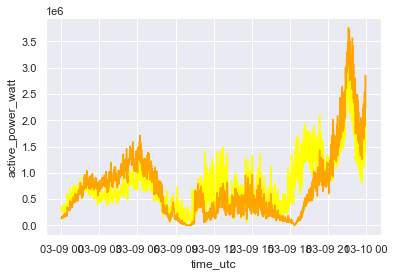

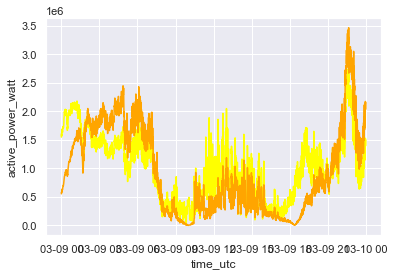

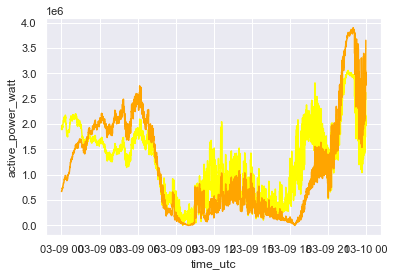

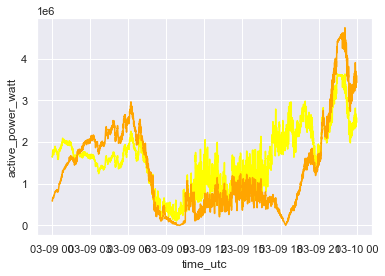

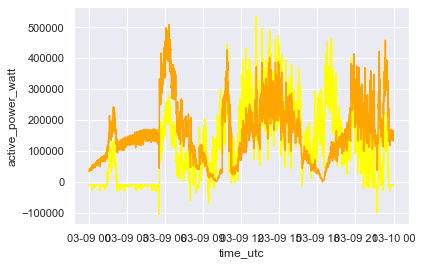

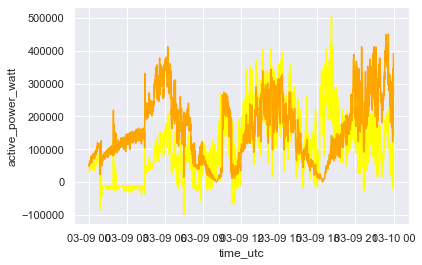

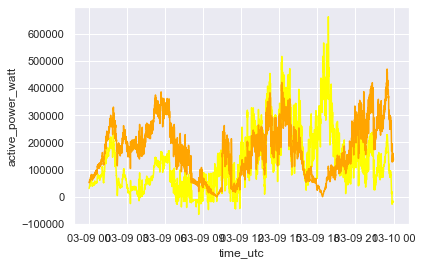

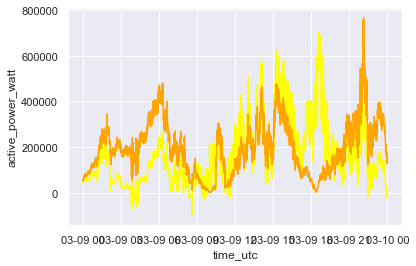

In [52]:
for id in [47, 49, 50, 54, 93, 94, 96, 97]:
    dfid = generate_forecast(id)
    dfid.to_csv(f"../online_data/dummy_forecast_9march_id{id}.csv", index = False)